# SMOTE

In [1]:
%load_ext autoreload
%autoreload 2

!python --version

Python 3.7.6


In [2]:
import sys
sys.path.append('..')

In [3]:
from src.dataset import DatasetForClassification

In [4]:
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC

from imblearn.over_sampling import SMOTE

In [5]:
from src.evaluation import custom_classification_report

## Load the dataset

In [6]:
dataset = DatasetForClassification('../data/fifa_processed_for_cls.csv', ['Position (4)', 'Position (13)'])

## Classification of "Position (4)"

In [7]:
X_train, X_test, y_train, y_test = dataset.get_data('Position (4)')

labels = dataset.get_labels('Position (4)')

Do oversampling using SMOTE.

In [8]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({3: 5452, 1: 4709, 0: 2738, 2: 1618})
Resampled dataset shape Counter({0: 5452, 2: 5452, 3: 5452, 1: 5452})


We can see that we increased the number of observations in classes.

### RandomForestClassifier

attack
precision: 0.8411764705882353
recall: 0.8011204481792717
f1-score: 0.8206599713055955
support: 714


defense
precision: 0.9386343993085566
recall: 0.9195596951735817
f1-score: 0.9289991445680069
support: 1181


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8318903318903319
recall: 0.8682228915662651
f1-score: 0.8496683861459101
support: 1328


accuracy: 0.8865013774104683


macro avg
precision: 0.902925300446781
recall: 0.8972257587297796
f1-score: 0.8998318755048782
support: 3630


weighted avg
precision: 0.887294100918393
recall: 0.8865013774104683
f1-score: 0.8866277757710137
support: 3630


F1
micro: 0.8865013774104683
macro: 0.8998318755048782


CPU times: user 6.06 s, sys: 0 ns, total: 6.06 s
Wall time: 6.05 s


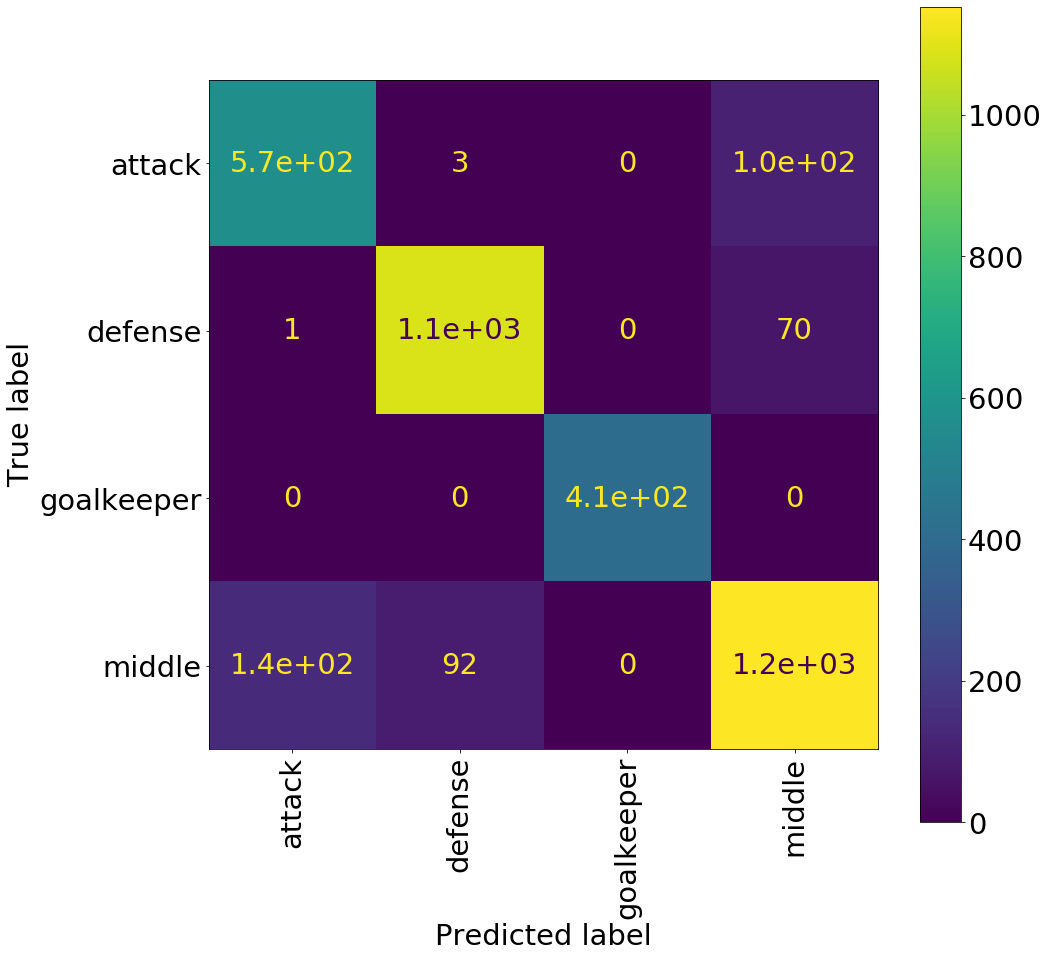

In [9]:
%%time

clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X_train_res, y_train_res)

custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

### LogisticRegressionCV

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


attack
precision: 0.861764705882353
recall: 0.7771883289124668
f1-score: 0.8172942817294282
support: 754


defense
precision: 0.9386343993085566
recall: 0.9329896907216495
f1-score: 0.9358035329599311
support: 1164


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8261183261183261
recall: 0.8773946360153256
f1-score: 0.8509847640282423
support: 1305


accuracy: 0.8881542699724518


macro avg
precision: 0.906629357827309
recall: 0.8968931639123605
f1-score: 0.9010206446794005
support: 3630


weighted avg
precision: 0.8890979186266857
recall: 0.8881542699724518
f1-score: 0.887892649544409
support: 3630


F1
micro: 0.8881542699724518
macro: 0.9010206446794005


CPU times: user 4min 1s, sys: 3min 17s, total: 7min 19s
Wall time: 1min 51s


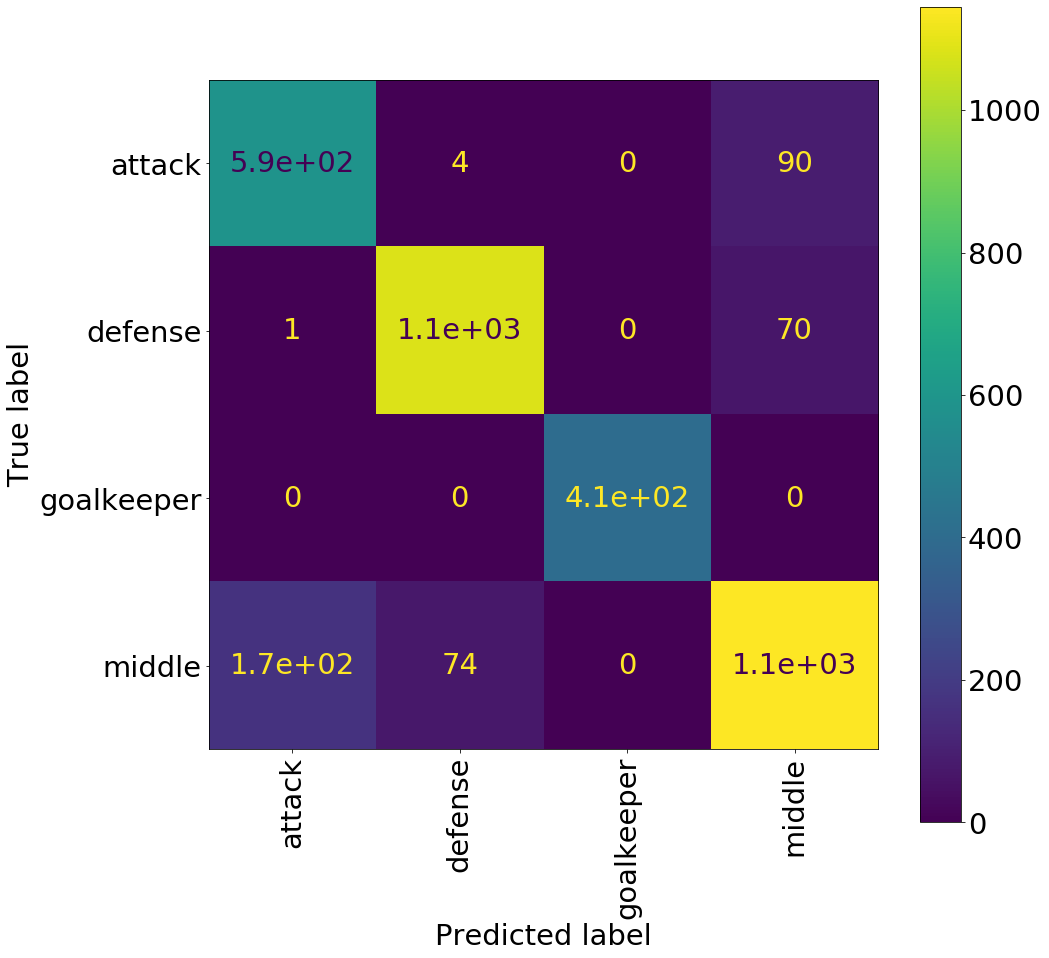

In [10]:
%%time

clf = LogisticRegressionCV(max_iter=100)
clf = clf.fit(X_train_res, y_train_res)

custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Classification of "Position (13)"

In [11]:
X_train, X_test, y_train, y_test = dataset.get_data('Position (13)')

labels = dataset.get_labels('Position (13)')

Do oversampling using SMOTE.

In [12]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({11: 2494, 1: 1785, 9: 1719, 4: 1618, 3: 1164, 6: 1050, 2: 1029, 12: 885, 7: 864, 0: 820, 5: 486, 10: 467, 8: 136})
Resampled dataset shape Counter({1: 2494, 10: 2494, 4: 2494, 0: 2494, 12: 2494, 3: 2494, 7: 2494, 11: 2494, 6: 2494, 9: 2494, 2: 2494, 5: 2494, 8: 2494})


### RandomForestClassifier

attacking midfielder
precision: 0.5555555555555556
recall: 0.43478260869565216
f1-score: 0.4878048780487805
support: 230


central attack
precision: 0.8956916099773242
recall: 0.7424812030075187
f1-score: 0.8119218910585816
support: 532


central defense
precision: 0.8091603053435115
recall: 0.660436137071651
f1-score: 0.7272727272727274
support: 321


deffensive midfielder
precision: 0.5927272727272728
recall: 0.5224358974358975
f1-score: 0.5553662691652471
support: 312


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.1452991452991453
recall: 0.19318181818181818
f1-score: 0.1658536585365854
support: 88


left defense
precision: 0.8272058823529411
recall: 0.7401315789473685
f1-score: 0.78125
support: 304


left midfielder
precision: 0.2077922077922078
recall: 0.2874251497005988
f1-score: 0.2412060301507538
support: 167


middle
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 3


midfielder
precision: 0.6203904555314533
recall: 0.65
f1-scor

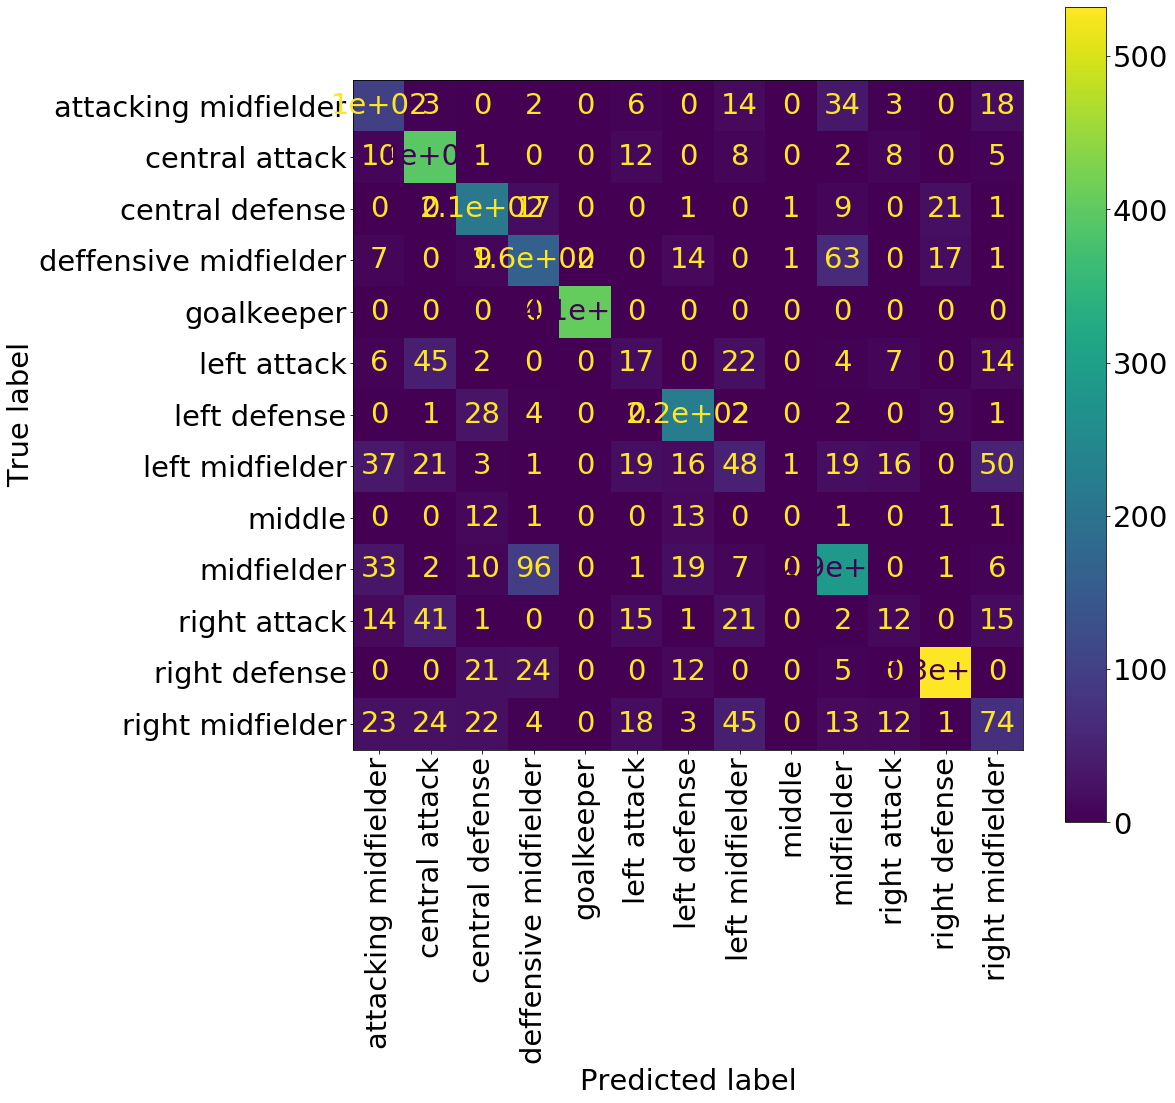

In [13]:
%%time

clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X_train_res, y_train_res)

custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

### LogisticRegressionCV

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


attacking midfielder
precision: 0.5611111111111111
recall: 0.4225941422594142
f1-score: 0.4821002386634845
support: 239


central attack
precision: 0.7709750566893424
recall: 0.7888631090487239
f1-score: 0.7798165137614679
support: 431


central defense
precision: 0.7938931297709924
recall: 0.7003367003367004
f1-score: 0.744186046511628
support: 297


deffensive midfielder
precision: 0.6618181818181819
recall: 0.5669781931464174
f1-score: 0.610738255033557
support: 321


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.1794871794871795
recall: 0.1794871794871795
f1-score: 0.1794871794871795
support: 117


left defense
precision: 0.7720588235294118
recall: 0.8267716535433071
f1-score: 0.7984790874524714
support: 254


left midfielder
precision: 0.22943722943722944
recall: 0.35333333333333333
f1-score: 0.27821522309711283
support: 150


middle
precision: 0.10344827586206896
recall: 0.03296703296703297
f1-score: 0.049999999999999996
support: 91



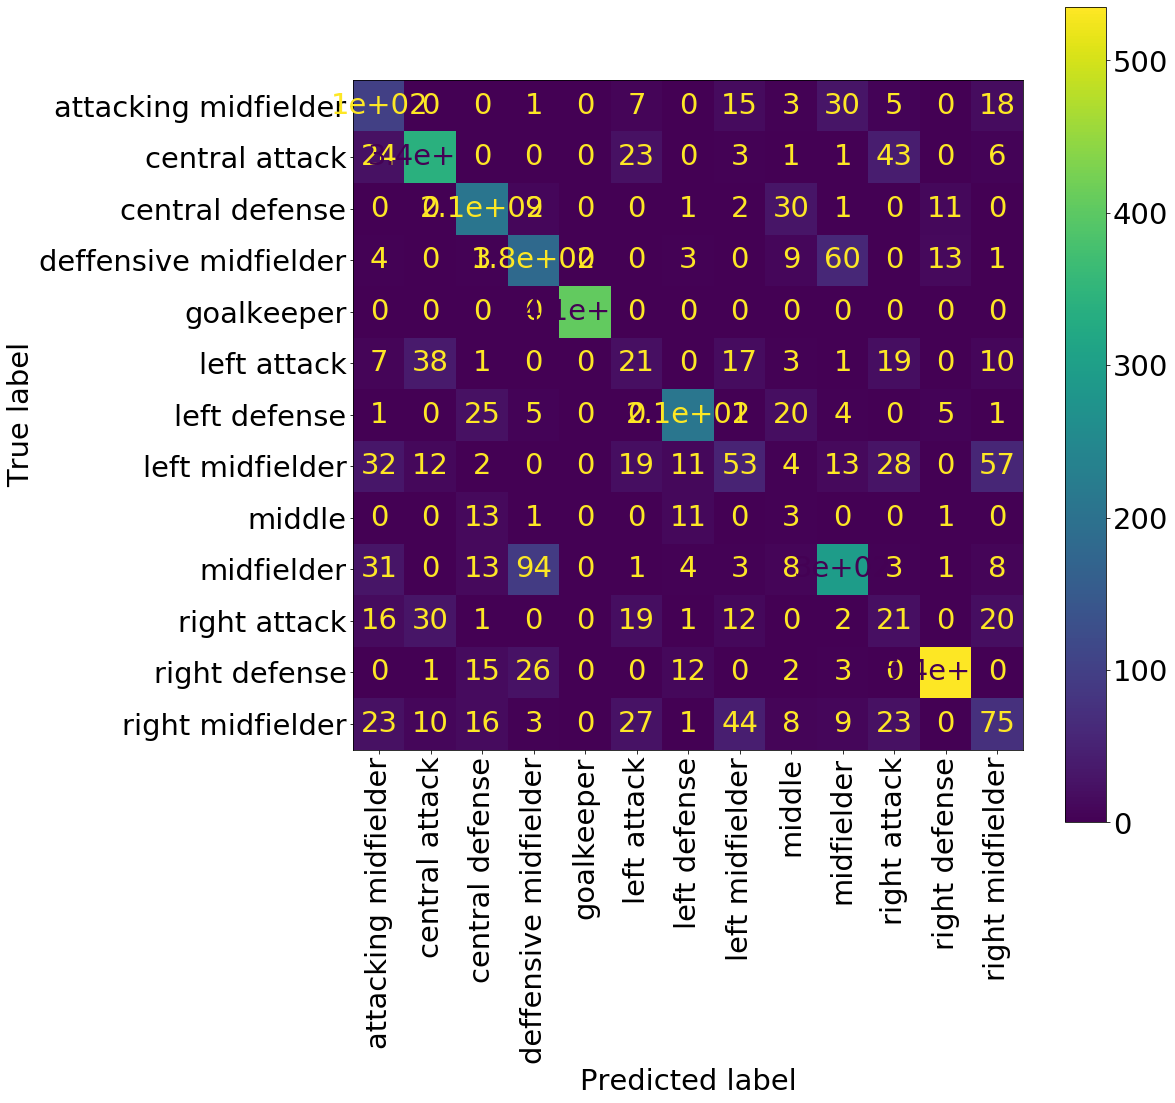

In [14]:
%%time

clf = LogisticRegressionCV(max_iter=100)
clf = clf.fit(X_train_res, y_train_res)

custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Conclusion

## Position (4)

**Random Forest**

f1 micro: 0.888

f1 macro: 0.899

**Random Forest w/ SMOTE**

f1 micro: 0.886

f1 macro: 0.899

**Logistic Regression**

f1 micro: 0.896

f1 macro: 0.907
    
**Logistic Regression w/ SMOTE**

*Takes too long to execute.*

## Position (13)

**Random Forest**

f1 micro: 0.684

f1 macro: 0.501

**Random Forest w/ SMOTE**

f1 micro: 0.682

f1 macro: 0.519

**Logistic Regression**

micro: 0.713

macro: 0.534
    
**Logistic Regression w/ SMOTE**

*Takes too long to execute.*

Since the logistic regression takes too long to execute, the random forest might be a better option for hyper parameter tunning in the future.

## Other oversampling methods

Try different oversampling methods and compare them.

In [15]:
X_train, X_test, y_train, y_test = dataset.get_data('Position (13)')

labels = dataset.get_labels('Position (13)')

In [25]:
from sklearn.metrics import f1_score

def evaluate(oversampling):
    print('\n---\n')
    
    if oversampling is not None:
        print(oversampling)

        X_train_new, y_train_new = oversampling.fit_resample(X_train, y_train)

        print('\nOriginal dataset shape %s' % Counter(y_train))
        print('Resampled dataset shape %s' % Counter(y_train_res))
    else:
        X_train_new = X_train
        y_train_new = y_train
    
    clf = RandomForestClassifier(random_state=42)
    clf = clf.fit(X_train_new, y_train_new)
    
    y_pred = clf.predict(X_test)
    
    print('\nResults:\n')
    
    for average in ['micro', 'macro']:
        print(f'{average}: {f1_score(y_test, y_pred, average=average)}')
        
    print('\n---\n\n')

In [26]:
%%time

from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SVMSMOTE

oversamplings = [
    None,
    RandomOverSampler(random_state=42),
    SVMSMOTE(random_state=42, n_jobs=-1),
    SVMSMOTE(random_state=42, n_jobs=-1, k_neighbors=10, m_neighbors=15),
    SVMSMOTE(random_state=42, n_jobs=-1, k_neighbors=15, m_neighbors=30),
    SVMSMOTE(random_state=42, n_jobs=-1, k_neighbors=20, m_neighbors=40),
    SMOTE(random_state=42, n_jobs=-1),
    SMOTE(random_state=42, n_jobs=-1, k_neighbors=10),
    SMOTE(random_state=42, n_jobs=-1, k_neighbors=15),
    SMOTE(random_state=42, n_jobs=-1, k_neighbors=20),
    BorderlineSMOTE(random_state=42, n_jobs=-1),
    BorderlineSMOTE(random_state=42, n_jobs=-1, k_neighbors=10),
]

for oversampling in oversamplings:
    evaluate(oversampling)


---


Results:

micro: 0.6873278236914601
macro: 0.5041835824887555

---



---

RandomOverSampler(random_state=42, sampling_strategy='auto')

Original dataset shape Counter({11: 2494, 1: 1785, 9: 1719, 4: 1618, 3: 1164, 6: 1050, 2: 1029, 12: 885, 7: 864, 0: 820, 5: 486, 10: 467, 8: 136})
Resampled dataset shape Counter({1: 2494, 10: 2494, 4: 2494, 0: 2494, 12: 2494, 3: 2494, 7: 2494, 11: 2494, 6: 2494, 9: 2494, 2: 2494, 5: 2494, 8: 2494})

Results:

micro: 0.6856749311294766
macro: 0.5121410506999889

---



---

SVMSMOTE(k_neighbors=5, m_neighbors=10, n_jobs=-1, out_step=0.5,
         random_state=42, sampling_strategy='auto', svm_estimator=None)

Original dataset shape Counter({11: 2494, 1: 1785, 9: 1719, 4: 1618, 3: 1164, 6: 1050, 2: 1029, 12: 885, 7: 864, 0: 820, 5: 486, 10: 467, 8: 136})
Resampled dataset shape Counter({1: 2494, 10: 2494, 4: 2494, 0: 2494, 12: 2494, 3: 2494, 7: 2494, 11: 2494, 6: 2494, 9: 2494, 2: 2494, 5: 2494, 8: 2494})

Results:

micro: 0.6782369146005509
mac

ADASYN is not suitable for our dataset.

_"Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead."_

As we can see oversampling did not really improved the model.

Generally the f1 macro increased and f1 micro decreased as a tradeoff.